# Sommaire

* [Import des librairies](#Import-des-librairies)
* [Recherche d'un model](#Recherche-d'un-model)
    * [visualisation des données](#Visualisation-des-données)
        * [Regression linéaire](#Regression-linéaire)
    * [Scaling des données](#Scaling-des-Données)
    * [Model du KNN](#Model-du-KNN)
    * [Ajout de Features](#Ajout-de-Features)
* [Score du Knn](#Knn-score)
* [Score de la Régression Linéaire](#Regression-linéaire-Score)
    

# Import des librairies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
from sklearn.impute import MissingIndicator 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import RobustScaler
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from sklearn.cluster import KMeans
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

In [2]:
df = pd.read_csv('silicon_valley_real.txt' , delimiter = ",")
df = df.drop(['Unnamed: 0'], axis=1)
df = pd.get_dummies(df, columns=["ocean_proximity"], prefix=["encoding"])
df = df.dropna()
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,encoding_<1H OCEAN,encoding_INLAND,encoding_ISLAND,encoding_NEAR BAY,encoding_NEAR OCEAN
0,-119.84,36.77,6.0,1853.0,473.0,1397.0,417.0,1.4817,72000.0,0,1,0,0,0
1,-117.80,33.68,8.0,2032.0,349.0,862.0,340.0,6.9133,274100.0,1,0,0,0,0
2,-120.19,36.60,25.0,875.0,214.0,931.0,214.0,1.5536,58300.0,0,1,0,0,0
3,-118.32,34.10,31.0,622.0,229.0,597.0,227.0,1.5284,200000.0,1,0,0,0,0
4,-121.23,37.79,21.0,1922.0,373.0,1130.0,372.0,4.0815,117900.0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16507,-121.90,39.59,20.0,1465.0,278.0,745.0,250.0,3.0625,93800.0,0,1,0,0,0
16508,-122.25,38.11,49.0,2365.0,504.0,1131.0,458.0,2.6133,103100.0,0,0,0,1,0
16509,-121.22,38.92,19.0,2531.0,461.0,1206.0,429.0,4.4958,192600.0,0,1,0,0,0
16510,-118.14,34.16,39.0,2776.0,840.0,2546.0,773.0,2.5750,153500.0,1,0,0,0,0


# Recherche d'un model 

Notre taget étant 'median_house_value' nous devons chercher les features corrélés avec cette dernière afin d'élaborer un model de prédiction

# Visualisation des données

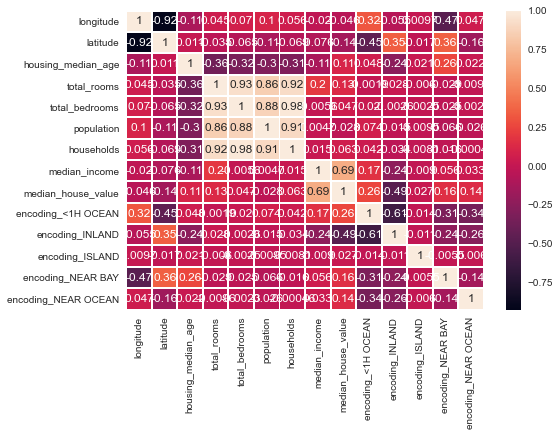

In [3]:
sns.heatmap(df.corr(), annot=True,linewidths=1)
sns.set(rc = {'figure.figsize':(35,30)})

La variable 'median_house_value' est fortement correlé avec 'median_income' ainsi que 'encoding_INLAND'  

On note une faible corrélation avec 'housing_median_age', 'total_rooms' et 'latitude'

Visualisons la distribution des données.  
Afin de simplifier la visualisation nous enlevons les features d'encodage

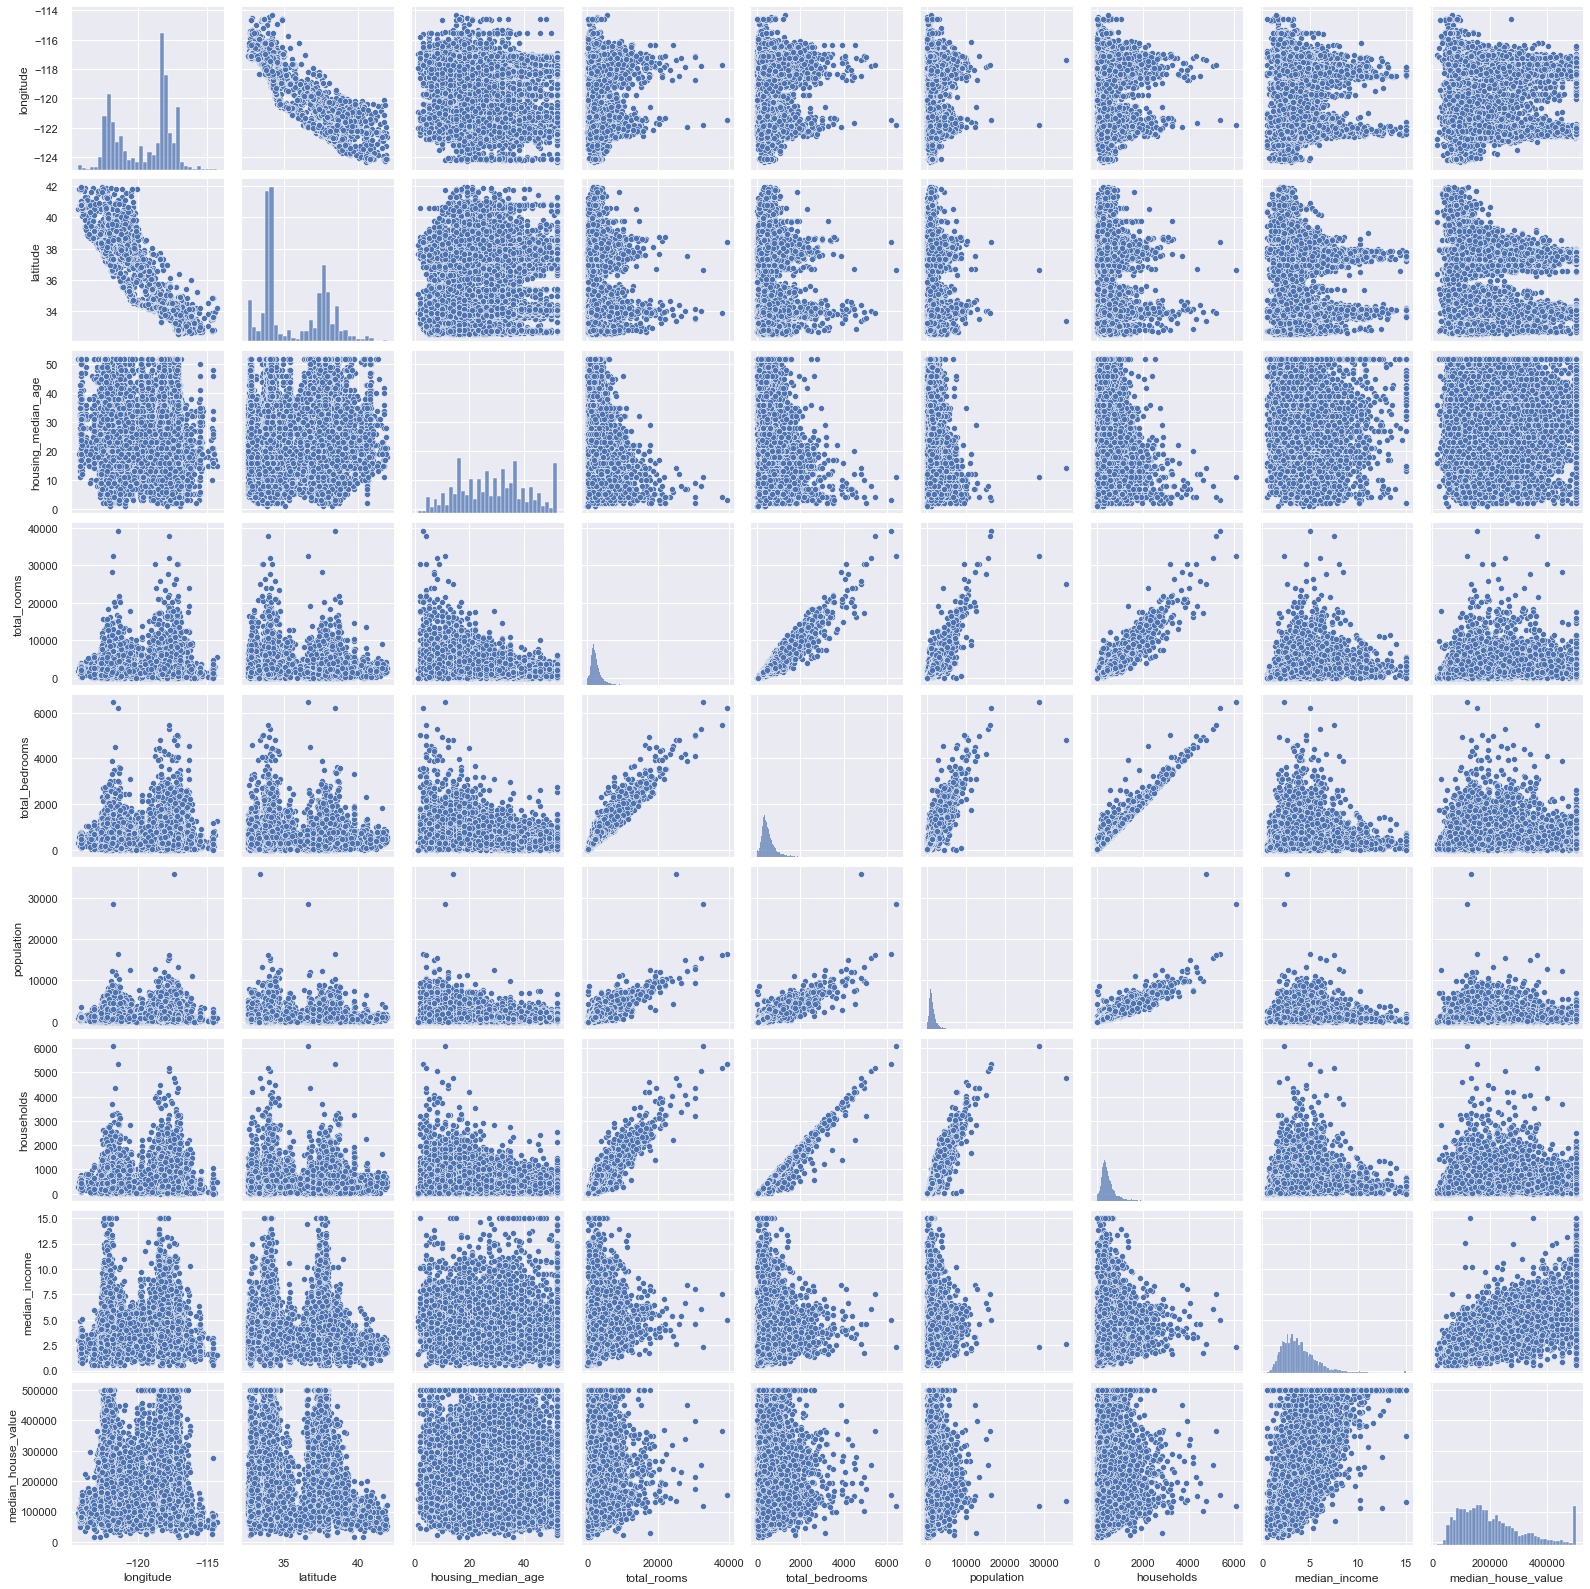

In [4]:
sns.pairplot(df.drop(['encoding_<1H OCEAN','encoding_INLAND','encoding_ISLAND','encoding_NEAR BAY','encoding_NEAR OCEAN'],axis=1))

On remarque clairement une distribution linéaire entre les variables housholds, total_bedrooms, total_rooms,'population'  
Le pairplot ne nous donne cependant pas plus d'information sur la variable median_house_value.  
Peut-être qu'un model de K-means pourrait aider notre futur model

Essayons un modèle de regression sur ces features

# Regression linéaire 

In [5]:
X = df[['median_income','encoding_INLAND']]
y= df['median_house_value']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [7]:
lr = LinearRegression()
lr.fit(X_train, y_train)
lr.predict(X_test)
lr.score(X_test, y_test)

0.5764086476625481

Ce score est correct mais insuffisant 

In [8]:
X = df[['median_income','encoding_INLAND','housing_median_age', 'total_rooms','latitude']]
y= df['median_house_value']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)
lr = LinearRegression()
lr.fit(X_train, y_train)
lr.predict(X_test)
lr.score(X_test, y_test)

0.5924428638482506

L'ajout de features augmente le score.  
Essayons avec tout le Dataset

In [10]:
X = df.drop(['median_house_value'], axis=1)
y= df['median_house_value']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)
lr = LinearRegression()
lr.fit(X_train, y_train)
lr.predict(X_test)
lr.score(X_test, y_test)

0.6463609733784875

Le score augmente encore.  
Utilisons une technique de Scaling. Etant donnée la présence d'Outliers nous utiliserons le RobustScaler

# Scaling des Données 

In [12]:
X = df.drop(['median_house_value'], axis=1)
y= df['median_house_value']

In [13]:
rs=RobustScaler()
X=rs.fit_transform(X)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)
lr = LinearRegression()
lr.fit(X_train, y_train)
rs=RobustScaler()
X=rs.fit_transform(X)
lr.predict(X_test)
lr.score(X_test, y_test)

0.646360973378489

Le score est le même essayons avec un autre modèle celui du Knn

# Model du KNN

In [15]:
X = df.drop(['median_house_value'], axis=1)
y= df['median_house_value']

In [16]:
rs=RobustScaler()
X=rs.fit_transform(X)

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)
knn = KNeighborsRegressor(n_neighbors=10)
knn.fit(X_train, y_train)
knn.predict(X_test)
knn.score(X_test, y_test)

0.7312277133149709

Ce model offre un meilleur score gardons le et essayons de manipuler le nombre de n_neighbors.  
Après plusieurs itérations le meilleur nombre semble être 10

# Ajout de Features

Ajouter des features augmente le score essayons un Kmeans

Model du Kmeans

# The Elbow Method

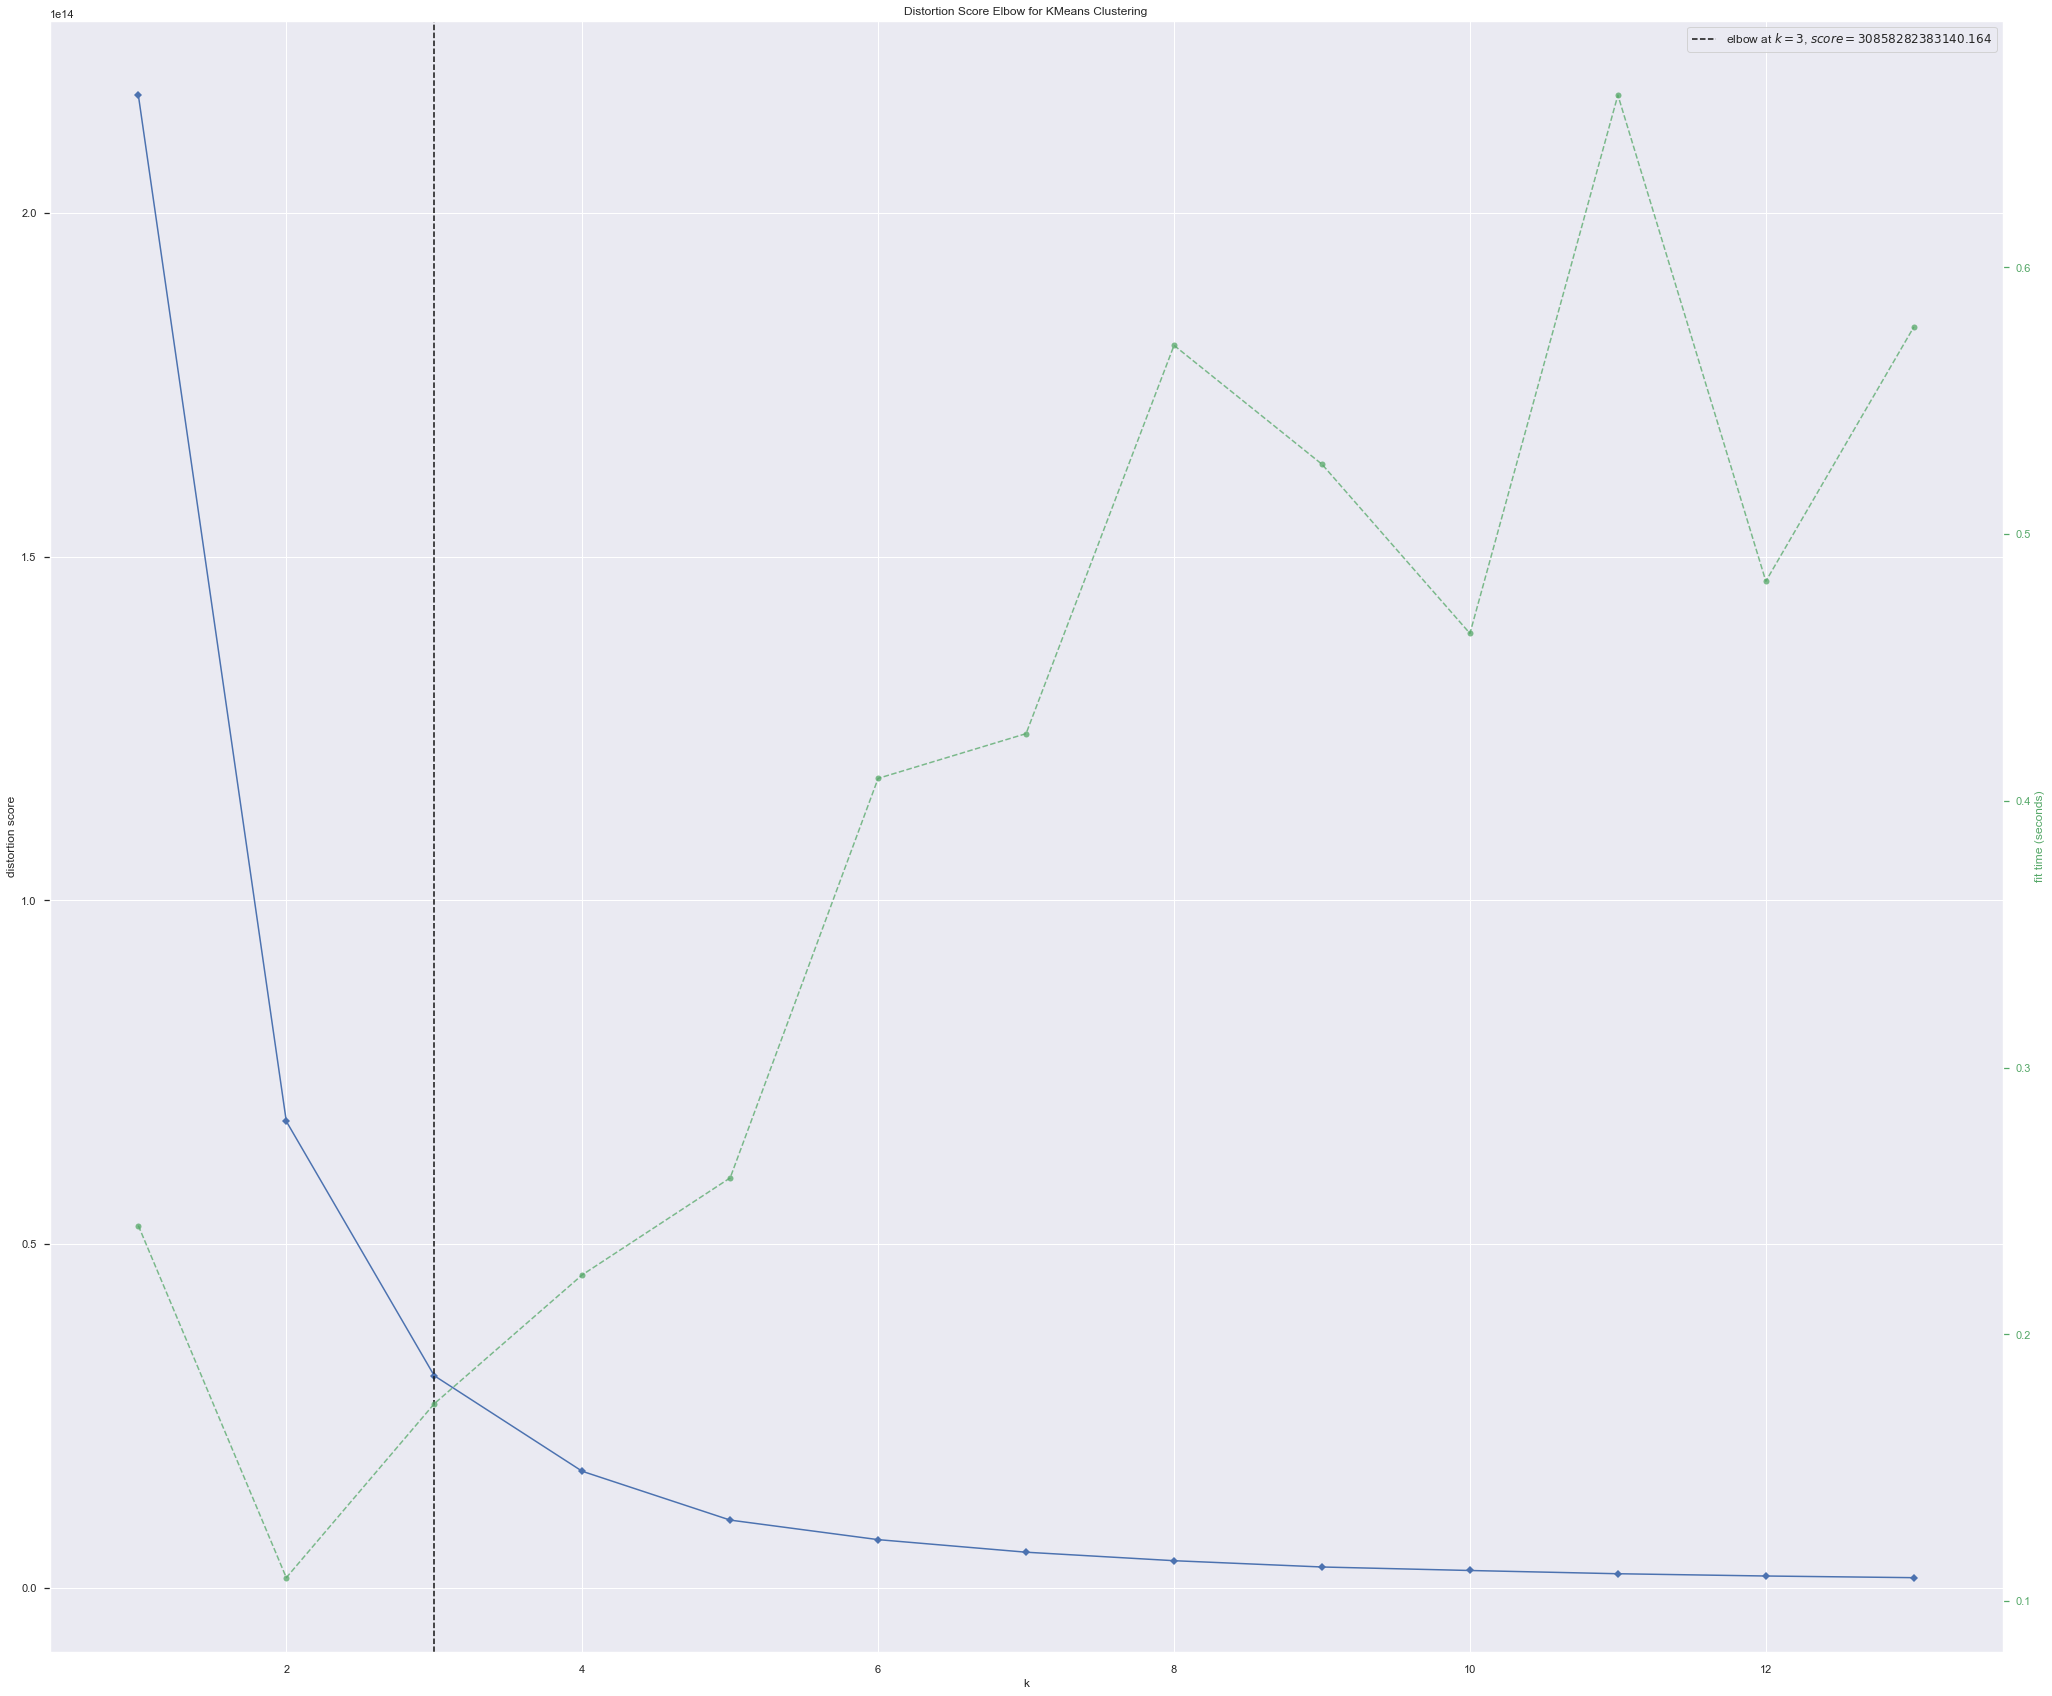

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [18]:
model = KMeans(random_state=4)
visualizer = KElbowVisualizer(model, k =(1,14))
visualizer.fit(df)
visualizer.show()

Nous trouvons 3 clusters

# Model du Kmeans

In [19]:
km = KMeans(n_clusters=3)
Cluster_feature = km.fit_predict(df)

In [20]:
km = KMeans(n_clusters=3)
Cluster_feature = km.fit_predict(df)

In [21]:
df['cluster'] = Cluster_feature
df['cluster'].value_counts()

1    8087
0    5790
2    2459
Name: cluster, dtype: int64

ré-essayons notre model avec cette nouvelle features

In [22]:
X = df.drop(['median_house_value'], axis=1)
y= df['median_house_value']

In [23]:
rs=RobustScaler()
X=rs.fit_transform(X)

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)
knn = KNeighborsRegressor(n_neighbors=8)
knn.fit(X_train, y_train)
knn.predict(X_test)
knn.score(X_test, y_test)

0.8878725787845099

Encodons le feature cluster

In [25]:
df = pd.get_dummies(df, columns=["cluster"], prefix=["cluster"])


In [26]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,encoding_<1H OCEAN,encoding_INLAND,encoding_ISLAND,encoding_NEAR BAY,encoding_NEAR OCEAN,cluster_0,cluster_1,cluster_2
0,-119.84,36.77,6.0,1853.0,473.0,1397.0,417.0,1.4817,72000.0,0,1,0,0,0,0,1,0
1,-117.80,33.68,8.0,2032.0,349.0,862.0,340.0,6.9133,274100.0,1,0,0,0,0,1,0,0
2,-120.19,36.60,25.0,875.0,214.0,931.0,214.0,1.5536,58300.0,0,1,0,0,0,0,1,0
3,-118.32,34.10,31.0,622.0,229.0,597.0,227.0,1.5284,200000.0,1,0,0,0,0,1,0,0
4,-121.23,37.79,21.0,1922.0,373.0,1130.0,372.0,4.0815,117900.0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16507,-121.90,39.59,20.0,1465.0,278.0,745.0,250.0,3.0625,93800.0,0,1,0,0,0,0,1,0
16508,-122.25,38.11,49.0,2365.0,504.0,1131.0,458.0,2.6133,103100.0,0,0,0,1,0,0,1,0
16509,-121.22,38.92,19.0,2531.0,461.0,1206.0,429.0,4.4958,192600.0,0,1,0,0,0,1,0,0
16510,-118.14,34.16,39.0,2776.0,840.0,2546.0,773.0,2.5750,153500.0,1,0,0,0,0,0,1,0


# Knn score

In [27]:
X = df.drop(['median_house_value'], axis=1)
y= df['median_house_value']

In [28]:
rs=RobustScaler()
X=rs.fit_transform(X)

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)
knn = KNeighborsRegressor(n_neighbors=8)
knn.fit(X_train, y_train)
y_pred=knn.predict(X_test)
knn.score(X_test, y_test)

0.9020659340577089

In [30]:
print(f'y_pred min : {y_pred.min()}')
print(f'r² score : {knn.score(X_test, y_test)}')
print(f'mae score : {mean_absolute_error(y_test, y_pred)}')
print(f'mae % score : {mean_absolute_percentage_error(y_test, y_pred)}')
print(f'mse score : {mean_squared_error(y_test, y_pred)}')
print(f'rmse score : {np.sqrt(mean_squared_error(y_test, y_pred))}')

y_pred min : 48887.5
r² score : 0.9020659340577089
mae score : 27135.519851591187
mae % score : 0.1532729122584101
mse score : 1330136691.646941
rmse score : 36471.03908098782


Ce score est très correct gardons le.  
Essayons aussi la Regression linéaire

# Regression linéaire Score

In [31]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_2 = lr.predict(X_test)
lr.score(X_test, y_test)

0.8949197594063558

In [32]:
print(f'y_pred min : {y_pred_2.min()}')
print(f'r² score : {lr.score(X_test, y_test)}')
print(f'mae score : {mean_absolute_error(y_test, y_pred_2)}')
print(f'mae % score : {mean_absolute_percentage_error(y_test, y_pred_2)}')
print(f'mse score : {mean_squared_error(y_test, y_pred_2)}')
print(f'rmse score : {np.sqrt(mean_squared_error(y_test, y_pred))}')

y_pred min : 30105.084517693816
r² score : 0.8949197594063558
mae score : 30109.909934572646
mae % score : 0.1800171904124696
mse score : 1427195759.0636146
rmse score : 36471.03908098782


La regression linéaire est moins intéressante 